In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('Crop_Yield_Prediction.csv')

Creating a Machine Learning model that is capable of predicting the crop yield according to the specific climatic conditions and the soil nutrient levels.

Features:

* Nitrogen - ratio of Nitrogen content in soil
* Phosphorus - ratio of Phosphorus content in soil
* Potassium - ratio of Potassium content in soil
* Temperature - temperature in degree Celsius
* Humidity - relative humidity in %
* pH_Value - pH value of the soil
* Rainfall - rainfall in mm

In [47]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [48]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [49]:
df.shape

(2200, 9)

In [50]:
df.duplicated().sum()

0

In [51]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [53]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [54]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
Yield           502
dtype: int64

In [55]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [56]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [57]:
crop_summary = pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary
# creates a summary table from a dataframe.
# it aggregates data based on 'Crop' and calculates summary statistics using mean for different features in the dataframe.

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [58]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new
# sets default integer index and the 'Crop' column as a regular column.

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


## Data Visualisation

In [59]:
df1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
# creates a new dataframe named df1 by selecting specific columns.

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


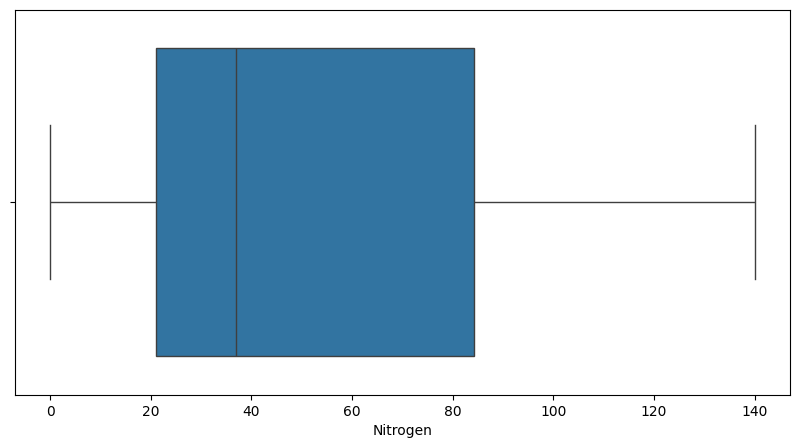

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


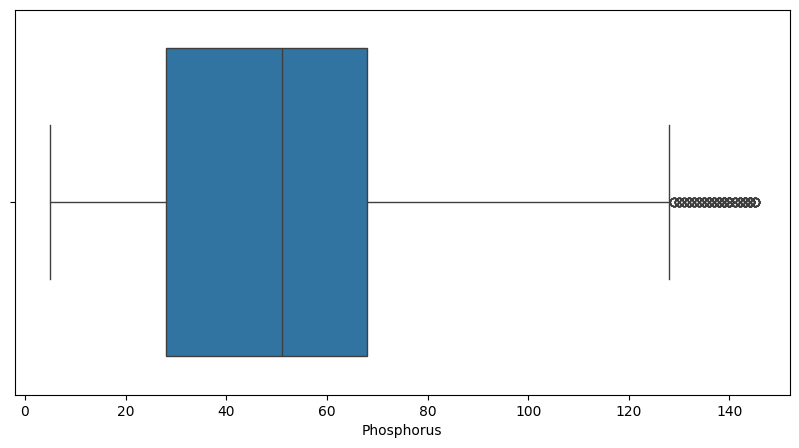

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


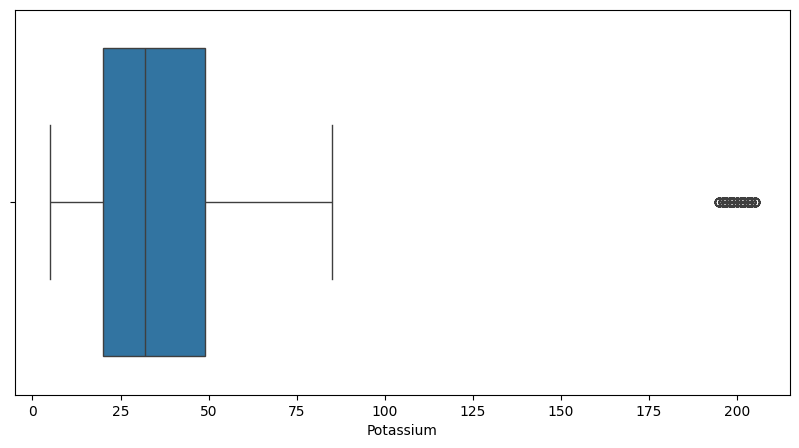

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


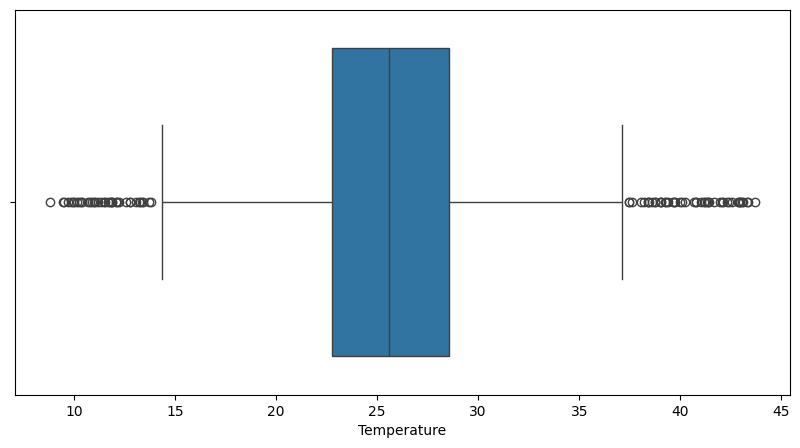

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


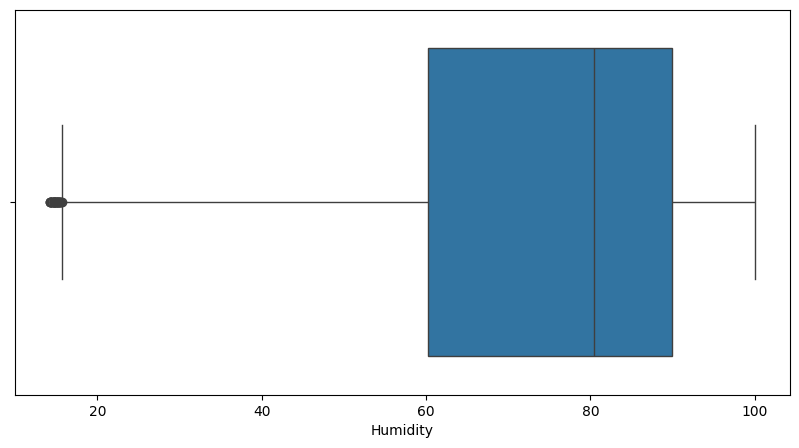

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


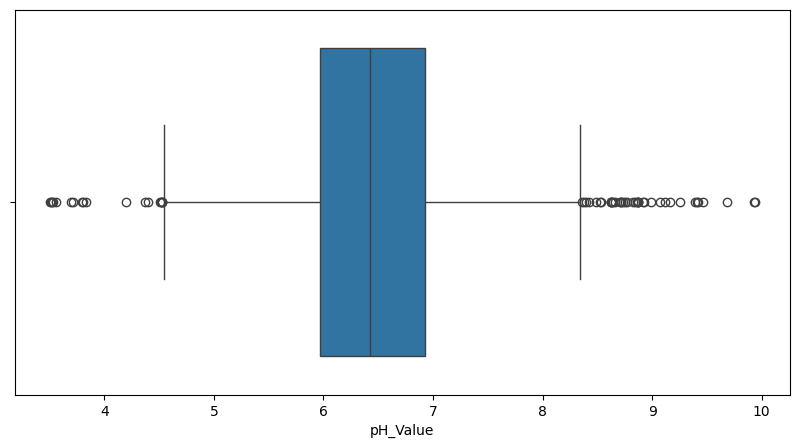

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3202404710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[i],palette='tab10')


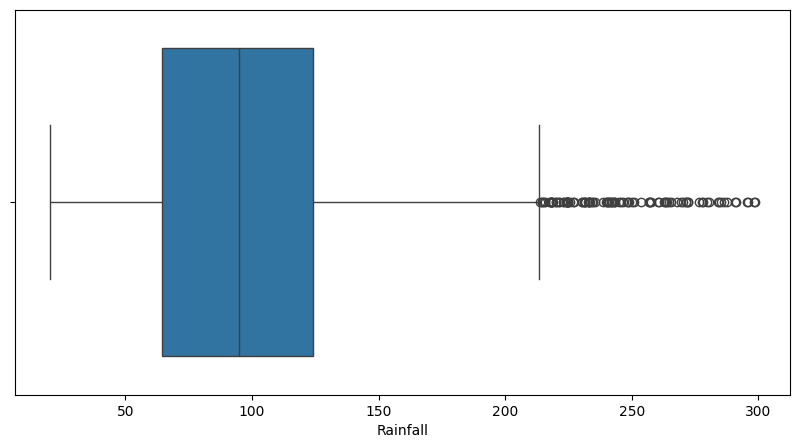

In [60]:
for i in df1.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df1[i],palette='tab10')
    plt.show()

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


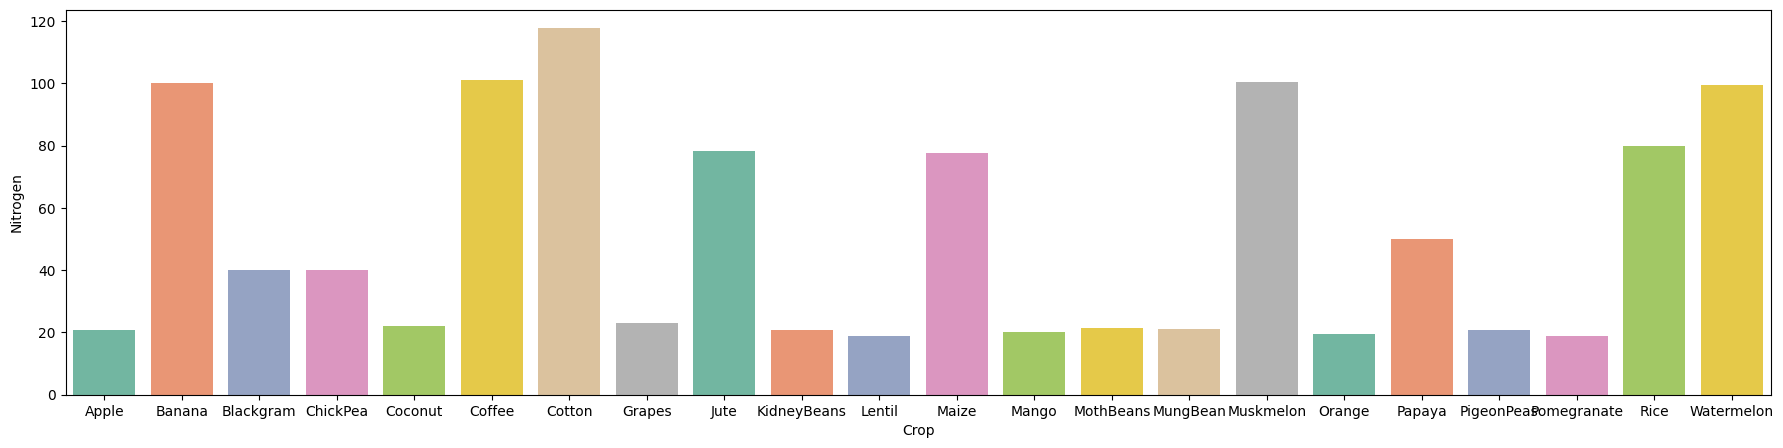

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


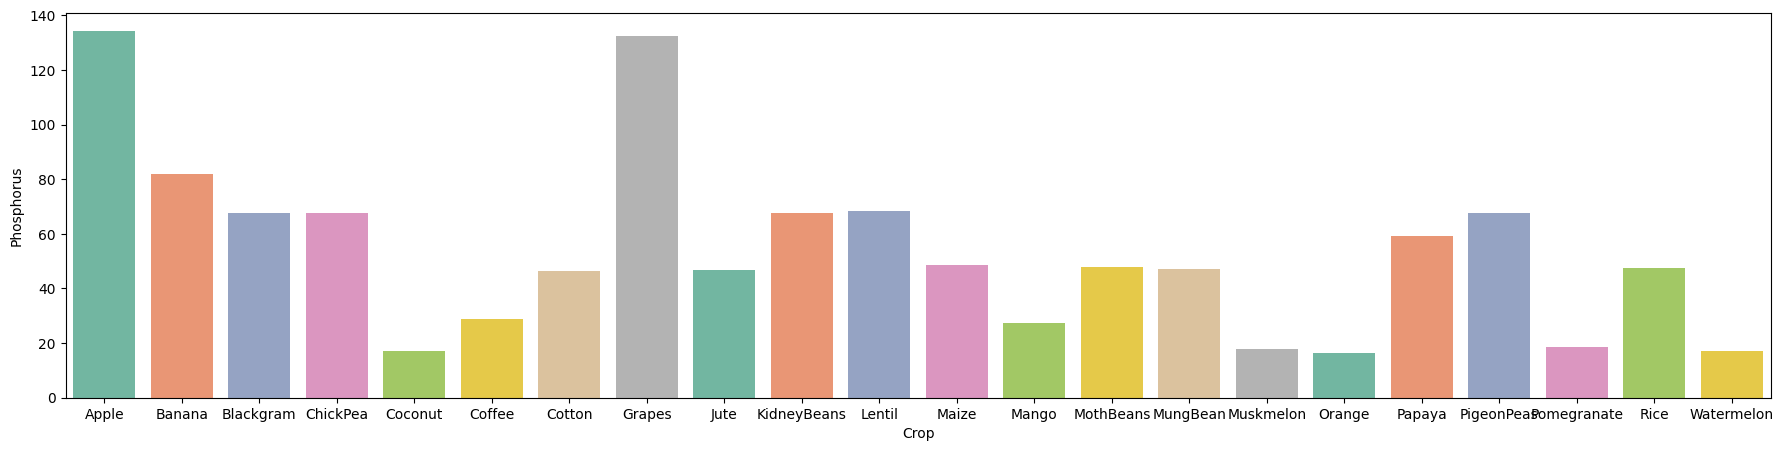

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


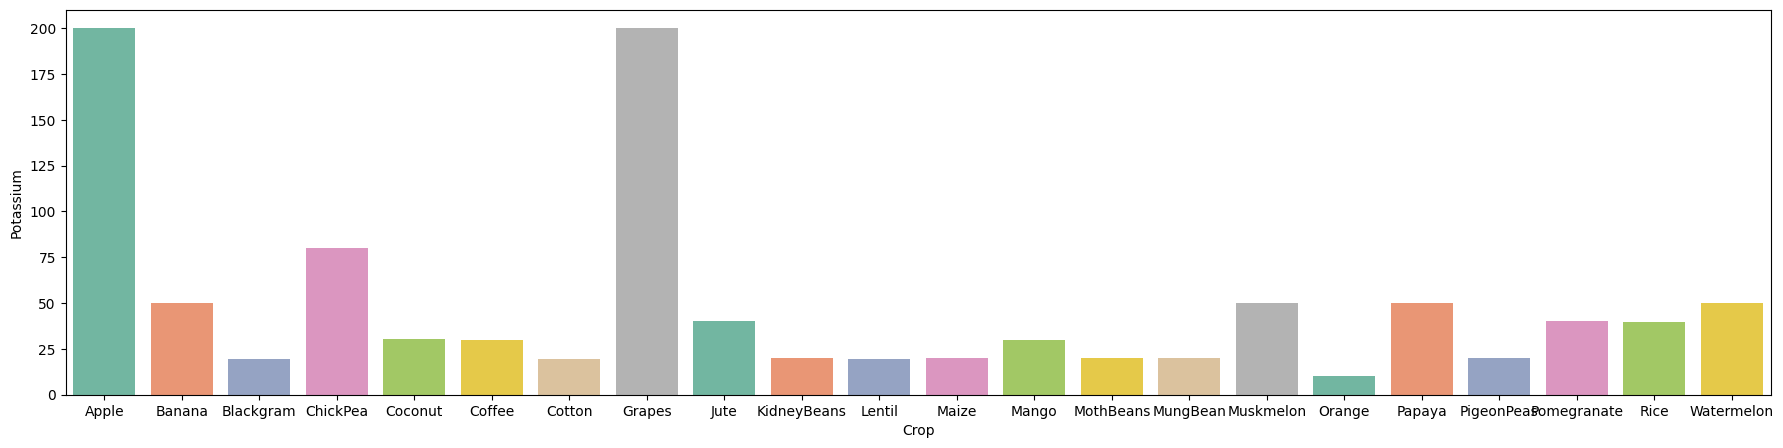

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


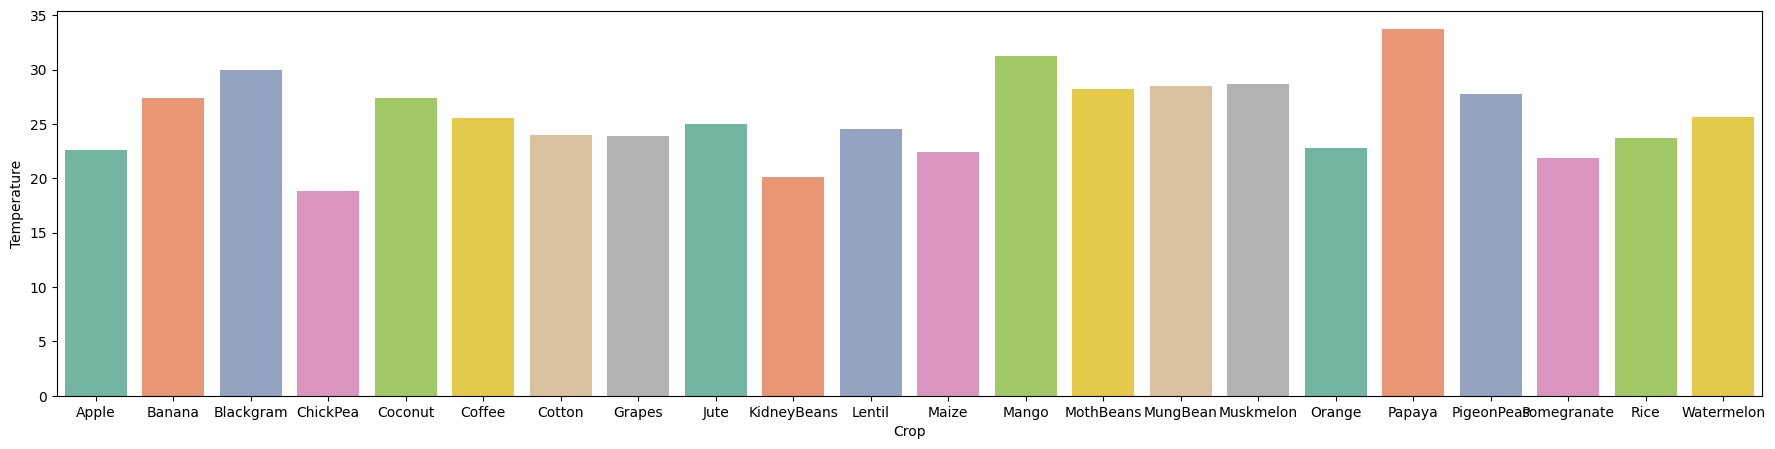

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


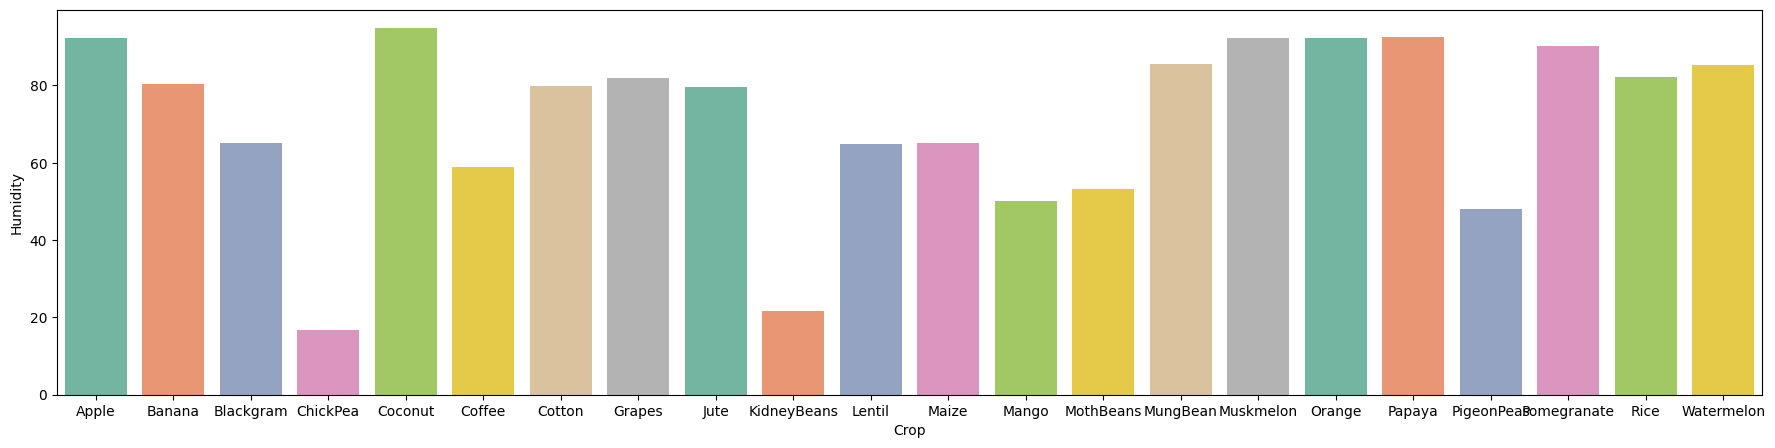

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


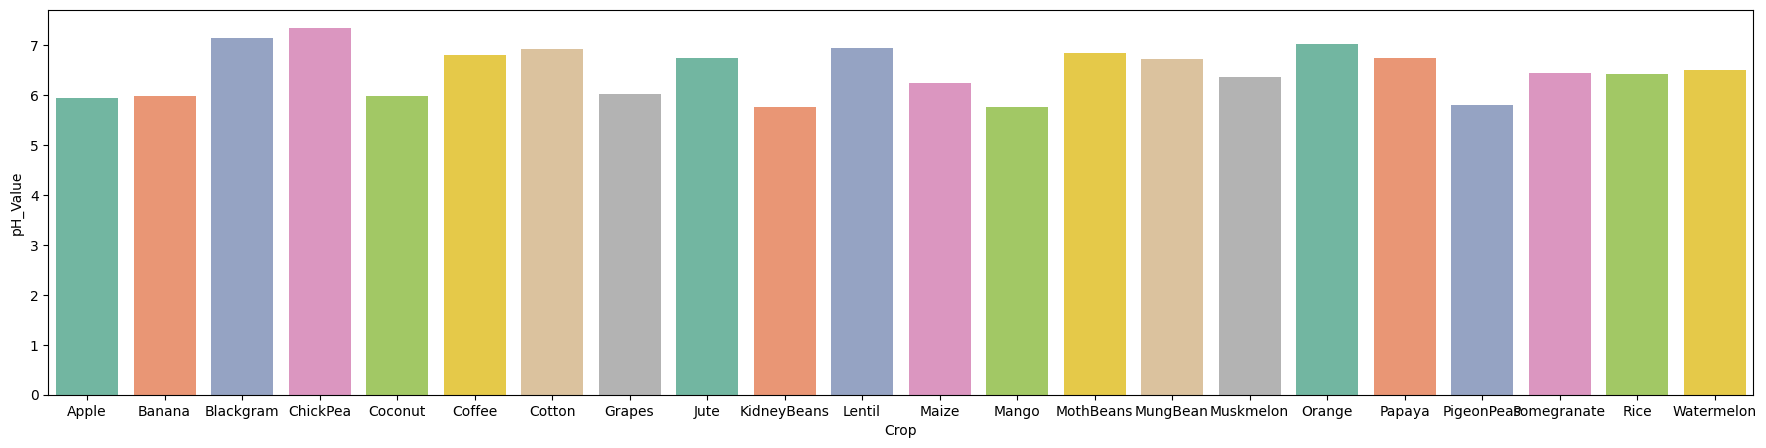

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\3683571922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')


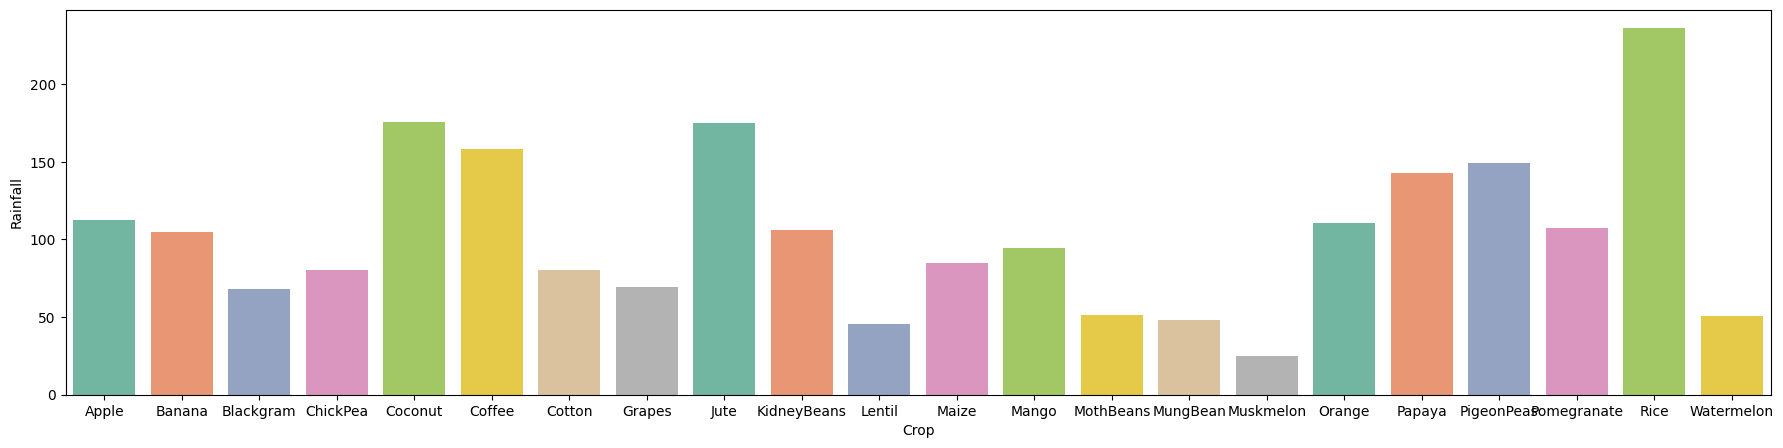

In [61]:
for i in df1.columns:
    plt.figure(figsize=(22,5))
    sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='Set2')
    plt.show()

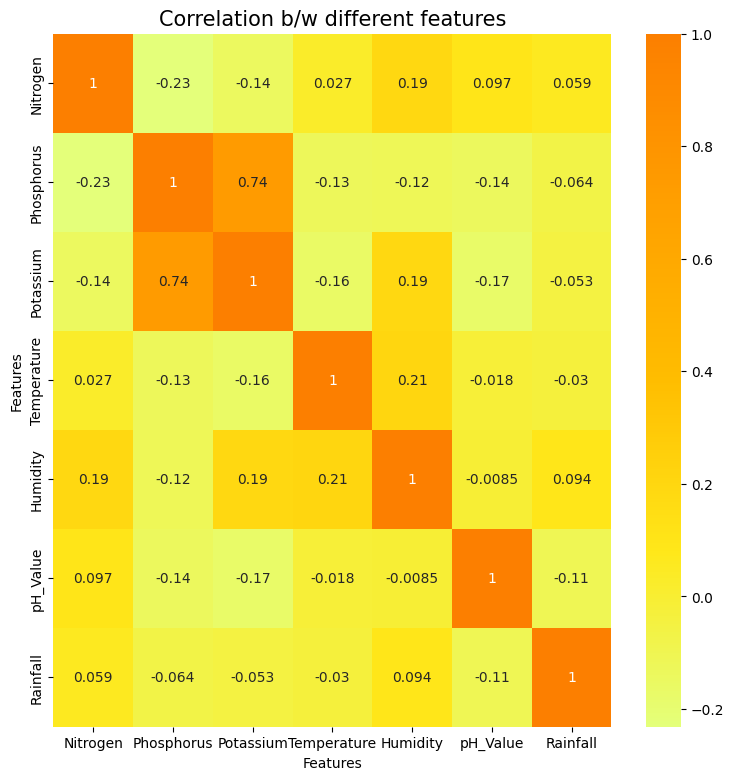

In [62]:
df1.corr()
fig, ax = plt.subplots(1, 1, figsize = (9,9))
sns.heatmap(df1.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='Features')
ax.set(ylabel='Features')
plt.title('Correlation b/w different features',fontsize=15,c='black')
plt.show()

## Data Pre-processing

### CATEGORICAL DATA TO NUMERICAL DATA

* This is a common preprocessing step in machine learning, especially when dealing with categorical data that needs to be converted into a format suitable for model training.

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
# creates an instance of the LabelEncoder class, which will be used to transform the categorical values into numerical labels.
df['Crop'] = le().fit_transform(df['Crop'])

In [64]:
df.skew()

Nitrogen        0.509721
Phosphorus      1.010773
Potassium       2.375167
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [65]:
df['Phosphorus'] = np.log(df['Phosphorus'])

df['Potassium'] = np.log(df['Potassium'])

# For RIGHT skewed.
# Logarithmic transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [66]:
df['Humidity'] = (df['Humidity'])** 2

# For LEFT skewed
# Exponential transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -0.522852
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [67]:
iq1=df['Yield'].quantile(0.25)
iq2=df['Yield'].quantile(0.75)
print(iq1)
print(iq2)
df['Yield'] = np.where(df['Yield']<iq1,iq1,df['Yield'])
# Replaces values in the 'Yield' column that are below Q1 with Q1.

df['Yield'] = np.where(df['Yield']>iq2,iq2,df['Yield'])
# Replaces values in the 'Yield' column that are above Q3 with Q3.

df.skew()

950.0
3500.0


Nitrogen       0.509721
Phosphorus    -0.782108
Potassium      0.804010
Temperature    0.184933
Humidity      -0.522852
pH_Value       0.283929
Rainfall       0.965756
Crop           0.000000
Yield          0.283069
dtype: float64

### Splitting the Dataset into Train Dataset and Test Dataset

In [68]:
X = df.iloc[:,0:8]
# extracts the first 8 columns of the dataframe data using integer-based indexing (iloc). 
# The syntax [:, 0:8] means to select all rows (:) and columns from index 0 up to index 8 (exclusive). 
# These columns represent the features or independent variables.

y = df.iloc[:,8]
# extracts the 9th column (index 8) of the dataframe data using integer-based indexing (iloc). 
# The syntax [:, 8] means to select all rows (:) and only the column at index 8. 
# This column represents your target variable or dependent variable.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# X and y are assumed to be the feature matrix and target variable, respectively.
# test_size = 0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
# shuffle=True (default) indicates that the data will be shuffled before splitting, which helps in randomizing the samples.
# random_state=0 (default: None) sets the random seed for reproducibility ensuring that the same random splits are generated every time.

# After running this code, we will have:

# 1) X_train: The training set of features.
# 2) X_test: The testing set of features.
# 3) y_train: The training set of target values.
# 4) y_test: The testing set of target values.

### Building Model

In [70]:
from sklearn.metrics import mean_squared_error

1) Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred_lr = regressor_lr.predict(X_test)
# used to make predictions using a trained linear regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_lr.
# Each element of y_pred_lr corresponds to the predicted value for the corresponding row in the test set.

In [73]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
# Calculates the MSE of the predictions made by the linear regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)

Mean Squared Error (MSE) for Linear Regression: 1033830.4702856519


2) Decision Tree Regressor

WORKING

1) Data Partitioning: Decision Tree Regression partitions the feature space into regions based on feature values.
2) Split Selection: It selects optimal feature splits at each node to maximize information gain or minimize impurity (e.g., variance reduction for regression).
3) Leaf Node Prediction: Each leaf node in the decision tree predicts the target variable based on the average of training samples falling into that node.
4) Working Principle: Decision Tree Regression recursively splits the data based on feature thresholds, creating a tree structure to make predictions.

In [74]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
# creates a Linear Regression model object named regressor_dt. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_dt.fit(X_train, y_train)
# trains the Decision Tree Regression model using the input features (X_train) and corresponding target values (y_train).

DecisionTreeRegressor()

In [75]:
y_pred_dt = regressor_dt.predict(X_test)
# used to make predictions using a trained decision tree regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_dt.
# Each element of y_pred_dt corresponds to the predicted value for the corresponding row in the test set.

In [76]:
mse_dt = mean_squared_error(y_pred_dt, y_test)
# Calculates the MSE of the predictions made by the decision tree regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Decision Tree Regression:", mse_dt)

Mean Squared Error (MSE) for Decision Tree Regression: 1856814.759090909


3) Random Forest Regressor

WORKING

1) Ensemble Learning: Random Forest Regression builds multiple decision trees (forest) using random subsets of features and data points.
2) Tree Construction: Each decision tree is constructed independently to predict target values.
3) Aggregation: Predictions from all trees are aggregated (e.g., averaging for regression) to obtain the final prediction.
4) Bootstrap Sampling: Random forest uses bootstrap sampling to create diverse trees and reduce overfitting.

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
# creates a Random Forest Regression model object named regressor_rf. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_rf.fit(X_train, y_train)
# trains the Random Forest Regression model using the input features (X_train) and corresponding target values (y_train).

RandomForestRegressor()

In [78]:
y_pred_rf = regressor_rf.predict(X_test)
# used to make predictions using a trained random forest regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_rf.
# Each element of y_pred_rf corresponds to the predicted value for the corresponding row in the test set.

In [79]:
mse_rf = mean_squared_error(y_pred_rf, y_test)
# Calculates the MSE of the predictions made by the random forest regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Random Forest Regression:", mse_rf)

Mean Squared Error (MSE) for Random Forest Regression: 1009660.9778518181


#### 4) Support Vector Regressor
WORKING

1) Hyperplane Creation: SVM Regression finds the optimal hyperplane that best separates data points in feature space while maximizing margin.
2) Margin Maximization: It aims to maximize the margin between the hyperplane and the closest data points (support vectors).
3) Kernel Trick (Optional): SVM can use kernel functions to transform data into higher-dimensional space for nonlinear separation.
4) Regression Prediction: In regression, SVM predicts continuous target values based on the distance of data points from the hyperplane.

In [80]:
from sklearn.svm import SVR

regressor_svr = SVR()
# creates a Support Vector Regression model object named regressor_svr. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_svr.fit(X_train, y_train)
# trains the Support Vector Regression model using the input features (X_train) and corresponding target values (y_train).

SVR()

In [81]:
y_pred_svr = regressor_svr.predict(X_test)
# used to make predictions using a trained support vector regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_svr.
# Each element of y_pred_svr corresponds to the predicted value for the corresponding row in the test set.

In [82]:
mse_svr = mean_squared_error(y_pred_svr, y_test)
# Calculates the MSE of the predictions made by the support vector regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Support Vector Regression (SVR):", mse_svr)

Mean Squared Error (MSE) for Support Vector Regression (SVR): 1147891.0975545463


#### 5) K-Nearest Neighbor Regressor
WORKING

1) Data Storage: KNN Regression stores the entire training dataset as its "model" for regression tasks.
2) Distance Calculation: It calculates distances (e.g., Euclidean distance) between data points in feature space.
3) Neighbor Selection: KNN selects the k nearest neighbors to a new data point based on distance metrics.
4) Regression Prediction: For regression, KNN predicts the target value by averaging the target values of its k nearest neighbors.

In [83]:
from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor()
# creates a K-Nearest Neighbor model object named regressor_knn. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_knn.fit(X_train, y_train)
# trains the K-Nearest Neighbor Regression model using the input features (X_train) and corresponding target values (y_train).

KNeighborsRegressor()

In [84]:
y_pred_knn = regressor_knn.predict(X_test)
# used to make predictions using a trained k-nearest neighbor regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_knn.
# Each element of y_pred_knn corresponds to the predicted value for the corresponding row in the test set.

In [85]:
mse_knn = mean_squared_error(y_pred_knn, y_test)
# Calculates the MSE of the predictions made by the k-nearest neighbor regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression):", mse_knn)

Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression): 1245810.3739090909


#### Comparing all the Regressor models

C:\Users\aganu\AppData\Local\Temp\ipykernel_20004\1271798024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=algorithm_labels, y=mse_scores, palette='Spectral')


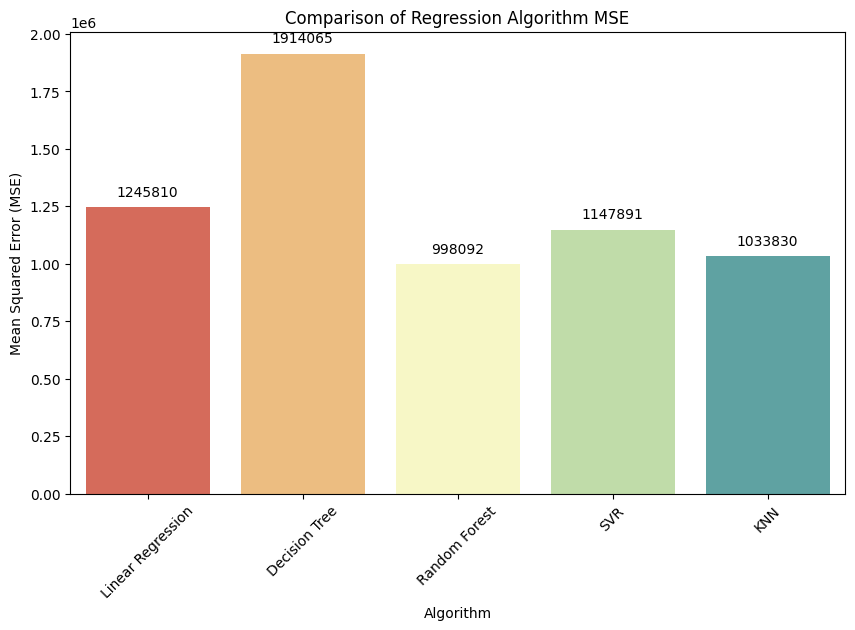

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

mse_scores = [1245810.3739, 1914064.9182, 998091.9225, 1147891.0976, 1033830.4703]
algorithm_labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

plt.figure(figsize=(10,6))
# Create the bar plot
ax = sns.barplot(x=algorithm_labels, y=mse_scores, palette='Spectral')

# Add data labels on top of each bar
for i, v in enumerate(mse_scores):
    ax.text(i, v + 0.05 * max(mse_scores), f'{v:.0f}', ha='center', va='top')  # Adjusts label position

# Set labels and title
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Algorithm MSE')
plt.xticks(rotation=45)

plt.show()

## Summary
The Random Forest Regression model is the top choice based on its lowest MSE, making it the most accurate and likely the most generalizable model for this dataset. If you’re prioritizing accuracy, Random Forest would be recommended, but if interpretability or speed is important, you might consider simpler models like Linear Regression or SVR.